# pandas tutorial

<img align="left" src="https://pandas.pydata.org/static/img/pandas.svg" alt="pandas" width="15%" height="15%"/>

<table align="left">
    <tr>
    <td><a href="https://colab.research.google.com/github/airnandez/numpandas/blob/master/notebooks/pandas.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a></td>
    <td><a href="https://mybinder.org/v2/gh/airnandez/numpandas/master?filepath=notebooks%2Fpandas.ipynb">
  <img src="https://mybinder.org/badge_logo.svg" alt="Launch Binder"/>
</a></td>
  </tr>
</table>

*Author: Fabio Hernandez*

*Last updated: 2025-02-26*

*Location:* https://github.com/airnandez/numpandas

--------------------
## Introduction

This is a short tutorial for helping you getting familiar with the **pandas** library, which is built on top of NumPy: you can find an introduction to NumPy in [this notebook](NumPy.ipynb).

This tutorial draws inspiration, ideas and sometimes material from several publicly available sources. Please see the [Acknowledgements](#Acknowledgements) section for details.

-----------------------
## Reference documentation

The entry point to the documentation of the stable release of pandas is http://pandas.pydata.org/pandas-docs/stable. It includes a [user guide](http://pandas.pydata.org/pandas-docs/stable/user_guide/index.html), an [API reference](http://pandas.pydata.org/pandas-docs/stable/reference/index.html) and a [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf).

The [DataCamp pandas Cheat Sheet](https://assets.datacamp.com/blog_assets/PandasPythonForDataScience.pdf) can also be a useful resource.

---------------------
## Import

**pandas** is customarily imported as shown below:

In [1]:
import pandas as pd
pd.__version__

'2.2.2'

In addition, for the examples given in this notebook we will need some packages from the Python standard library so we import them here:

In [2]:
import datetime

----------
## Overview

**pandas** offers three [main data structures](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html) designed to facilitate the programmatic manipulation of datasets with flexibility. Those data structures are [DataFrame](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe), [Series](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#series) and `Index`. We will start exploring what a `DataFrame` is and what we can do with it.

![dataframe](../images/dataframe-axis.png)

---------------------
## Load the dataset

Read a sample dataset, located in the `data/` subdirectory, which is formatted as a sequence of lines, each line composed of series of comma-separated values. Our sample dataset contains some data about the European Union, extracted from several sources, including [Wikipedia](https://en.wikipedia.org/wiki/European_Union), [EuroStat](https://ec.europa.eu/eurostat) and the [EU Budget](http://ec.europa.eu/budget) site.

In [3]:
import os
import requests

def download(url: str, path: str):
    """Download file at url and save it locally at path."""
    
    with requests.get(url, stream=True) as resp:
        if not resp.ok:
            raise f'Could not find file at URL {url}'        
        mode, data = 'wb', resp.content
        if 'text/plain' in resp.headers['Content-Type']:
            mode, data = 'wt', resp.text
        with open(path, mode) as f:
            f.write(data)

In [4]:
# Download the dataset if necessary to the directory 'data'
data_dir = 'data'
path = os.path.join('..', data_dir, 'european_union-2020.csv')

if not os.path.isfile(path):
    os.makedirs(os.path.join('..', data_dir), exist_ok=True)
    url = 'https://raw.githubusercontent.com/airnandez/numpandas/master/data/european_union-2020.csv'
    download(url, path)

In [5]:
# This particular dataset uses ';' as column separator (instead of the more usual ',')
# and uses ',' as the decimal separator
df = pd.read_csv(path, sep=';', decimal=',')

In [6]:
# Inspect the dimensions of the dataframe
rows, columns = df.shape
print(f'This dataframe has {rows} rows and {columns} columns')

This dataframe has 28 rows and 10 columns


**pandas** has built-in methods for doing I/O with files in several formats, including flat files (csv, fixed-width format, msgpack), Excel, JSON, HTML, HDF5, parquet, SQL, etc. See the [documentation](http://pandas.pydata.org/pandas-docs/stable/reference/io.html#flat-file) for details.

---------------------
## Exploring the dataset contents

To get an idea of what data is included in the dataset, you can explore the contents of the whole dataframe. Generally speaking, it is not a good idea to display the entire dataset, depending of the size of the data. It is recommended to first inspect the size of the dataframe as we did above. Our dataset is small, so we can display all of it:

In [7]:
df

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
0,Austria,AT,Vienna,1995-01-01,8901064,True,109167,68280,3147.58431,2022.82140
1,Belgium,BE,Brussels,1957-03-25,11522440,True,150006,102936,3861.85136,8776.94290
2,Bulgaria,BG,Sofia,2007-01-01,6951482,False,37929,39941,488.28963,2204.76239
3,Cyprus,CY,Nicosia,2004-05-01,888005,True,26170,17373,184.06386,266.36914
4,Czechia,CZ,Prague,2004-05-01,10693939,False,105888,77798,1712.08821,5275.53828
5,Germany,DE,Berlin,1957-03-25,83166711,True,886341,576319,25819.96730,12214.16123
6,Denmark,DK,Copenhaguen,1973-01-01,5822763,False,61384,66520,2405.63503,1500.26135
7,Estonia,EE,Tallinn,2004-05-01,1328976,True,18259,12801,229.20519,1169.21184
8,Greece,EL,Athens,1981-01-01,10718565,True,129459,95020,1516.60105,5257.70783
9,Spain,ES,Madrid,1986-01-01,47332614,True,750480,296248,10221.12749,11266.81341


You can also explore a fraction of the dataset by displaying, for instance, a few rows at the begining or at the end of the dataframe:

In [8]:
# Display the first 3 rows of the dataset. By default, the first 5 rows will be displayed
df.head(3)

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
0,Austria,AT,Vienna,1995-01-01,8901064,True,109167,68280,3147.58431,2022.82140
1,Belgium,BE,Brussels,1957-03-25,11522440,True,150006,102936,3861.85136,8776.94290
2,Bulgaria,BG,Sofia,2007-01-01,6951482,False,37929,39941,488.28963,2204.76239


You can also explore the last rows of the dataset or any intermediate rows, by using notation similar to the one used with NumPy arrays, on top of which **pandas** is built:

In [9]:
# Display the last 3 rows of the dataset
df.tail(3)

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
25,Sweden,SE,Stockholm,1995-01-01,10327589,False,115805,47718,3042.24425,1705.23041
26,Slovenia,SI,Ljubljana,2004-05-01,2095861,True,31319,15106,405.28640,936.15384
27,Slovakia,SK,Bratislava,2004-05-01,5457873,True,7016,3384,750.22609,2304.39488


In [10]:
# Display the rows from position 10 up to position 14 (not included)
df[10:14]

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
10,Finland,FI,Helsinki,1995-01-01,5525292,True,32758,17263,2016.39604,1541.97557
11,France,FR,Paris,1957-03-25,67320216,True,385591,299101,21008.77267,15085.63350
12,United Kingdom,GB,London,1973-01-01,67025542,False,680906,368385,14054.46706,7635.77080
13,Croatia,HR,Zagreb,2013-07-01,4058165,False,37726,40148,448.64161,2073.67501


Displaying a small random sample of the dataframe rows is generally good practice:

In [11]:
# Display 5 randomly selected rows and all columns
df.sample(5)

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
0,Austria,AT,Vienna,1995-01-01,8901064,True,109167,68280,3147.58431,2022.82140
7,Estonia,EE,Tallinn,2004-05-01,1328976,True,18259,12801,229.20519,1169.21184
22,Poland,PL,Warsaw,2004-05-01,37958138,False,226649,180594,4214.02283,16365.51676
20,Malta,MT,Valletta,2004-05-01,514564,True,28341,7998,107.26415,260.04661
15,Ireland,IE,Dublin,1973-01-01,4964440,True,85630,62004,1995.58910,2070.83618


**pandas** is designed for convenient handling of datasets organized as follows:

* each **observation** is saved in its own row
* each **variable** is saved in its own column

Our sample dataset is organized in exactly this way: we have one row per country and one column per variable of interest.

### An aside: understanding the dataset

In order to analyse any dataset, you need first to understand the meaning of the data. Here are the details of our sample data set:

| column                                    | meaning |
| ------------------------------------------|----------|
| `country`                                 | name of the country, in English |
| `country_code`                            | code of the country, as used by [Eurostat](https://ec.europa.eu/eurostat/statistics-explained/index.php/Glossary:Country_codes) |
| `accession_date`                          | date of accession of the country to the European Union (format: `yyyy-mm-dd`) |
| `population`                              | the number of persons having their usual residence in each country as of January 1st, 2020 (source: [Eurostat](https://ec.europa.eu/eurostat/tgm/table.do?tab=table&plugin=1&language=en&pcode=tps00001)) |
| `euro_zone_member`                        | `True` if the country is member of the [Eurozone](https://en.wikipedia.org/wiki/Eurozone)  |
| `immigration`                             | total number of long-term immigrants arriving into the country in 2019, as reported by each country (source: [Eurostat](https://ec.europa.eu/eurostat/tgm/table.do?tab=table&plugin=1&language=en&pcode=tps00176)) |
| `emigration`                              | total number of long-term emigrants leaving from the reporting country in 2019, as reported by each country (source: [Eurostat](https://ec.europa.eu/eurostat/tgm/table.do?tab=table&plugin=1&language=en&pcode=tps00177))  | 
| `contribution_to_eu_budget_millions_euro` | contribution to the EU budget for each country for year 2019, in millions euros (source: [European Commission](http://ec.europa.eu/budget/graphs/revenue_expediture.html)) |
| `expenditure_eu_budget_millions_euro`     | expenditure of the EU budget per country (for all programs), for year 2019, in millions euros (source: [European Commission](http://ec.europa.eu/budget/graphs/revenue_expediture.html)) |

Generally speaking, in order to draw sensible conclusions from any dataset you are analysing, make sure you understand precisely what is contained in the dataset and you understand where the data comes from.

### `dataframe` properties

**pandas** provides some methods for retrieving information about a [dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) object. [`pandas.Dataframe.info`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html#pandas-dataframe-info) gives a summary of the dataframe:

In [12]:
# Get a summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country                                  28 non-null     object 
 1   country_code                             28 non-null     object 
 2   capital                                  28 non-null     object 
 3   accession_date                           28 non-null     object 
 4   population                               28 non-null     int64  
 5   euro_zone_member                         28 non-null     bool   
 6   immigration                              28 non-null     int64  
 7   emigration                               28 non-null     int64  
 8   contribution_to_eu_budget_millions_euro  28 non-null     float64
 9   expenditure_eu_budget_millions_euro      28 non-null     float64
dtypes: bool(1), float64(2), int64(3), object(4)
memory u

We can also get the amount of memory (RAM) the dataframe is using (in bytes):

In [13]:
# Get the amount of bytes the dataframe is using (in RAM)
df.memory_usage(deep=True)

Index                                       132
country                                    1576
country_code                               1428
capital                                    1575
accession_date                             1652
population                                  224
euro_zone_member                             28
immigration                                 224
emigration                                  224
contribution_to_eu_budget_millions_euro     224
expenditure_eu_budget_millions_euro         224
dtype: int64

The attribute `Dataframe.columns` is an object of type `Index` (see [reference documentation](https://pandas.pydata.org/pandas-docs/stable/reference/indexing.html#index)):

In [14]:
# Retrieve the list of column names in the dataframe
df.columns

Index(['country', 'country_code', 'capital', 'accession_date', 'population',
       'euro_zone_member', 'immigration', 'emigration',
       'contribution_to_eu_budget_millions_euro',
       'expenditure_eu_budget_millions_euro'],
      dtype='object')

In [15]:
# df.columns is an iterable, like a Python list
for col in df.columns:
    print(col)

country
country_code
capital
accession_date
population
euro_zone_member
immigration
emigration
contribution_to_eu_budget_millions_euro
expenditure_eu_budget_millions_euro


In [16]:
# Get the number of values (of any type) contained in the dataframe
print(f'This dataframe contains {df.size} values')

This dataframe contains 280 values


### Cleaning the data

Very often, the *raw* data needs some cleaning, so that we can easily manipulate them with **pandas**. For instance, in this particular example, we need to make sure that **pandas** understands that the column `accession_date` is a date and not just a string. We need this for comparisons and filtering, that will visit later on.

In [17]:
# Display the types of each column in the dataframe
df.dtypes

country                                     object
country_code                                object
capital                                     object
accession_date                              object
population                                   int64
euro_zone_member                              bool
immigration                                  int64
emigration                                   int64
contribution_to_eu_budget_millions_euro    float64
expenditure_eu_budget_millions_euro        float64
dtype: object

In [18]:
# Convert column 'accession_date' to a date
df['accession_date'] = df['accession_date'].astype('datetime64[s]')
df['accession_date'].dtype

dtype('<M8[s]')

-------
## Selecting and filtering

**pandas** provides powerful built-in tools for filtering the data both row-wise and column-wise.

In [19]:
# This is a utility function we use for displaying the dataframe, which we use later
def highlight_column(s):
    return 'background-color: PaleGoldenrod'

### select all values in a given column

Selecting all the values in a column is a frequent operation we need to perform on any dataframe:

In [24]:
# Highlight the column 'population' that we want to select
df.head(3).style.map(highlight_column, subset=['population'])

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
0,Austria,AT,Vienna,1995-01-01 00:00:00,8901064,True,109167,68280,3147.584310,2022.821400
1,Belgium,BE,Brussels,1957-03-25 00:00:00,11522440,True,150006,102936,3861.851360,8776.942900
2,Bulgaria,BG,Sofia,2007-01-01 00:00:00,6951482,False,37929,39941,488.289630,2204.762390


In [25]:
# Select column 'population': this operation retrieves the values of
# that column for all rows in the dataframe
df['population']

0      8901064
1     11522440
2      6951482
3       888005
4     10693939
5     83166711
6      5822763
7      1328976
8     10718565
9     47332614
10     5525292
11    67320216
12    67025542
13     4058165
14     9769526
15     4964440
16    59641488
17     2794090
18      626108
19     1907675
20      514564
21    17407585
22    37958138
23    10295909
24    19328838
25    10327589
26     2095861
27     5457873
Name: population, dtype: int64

The value returned by this selection operation is a [pandas.Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) object. A `Series` is a **one-dimensional array with axis labels**. In this particular case the labels are integers but they may be of other types.

**NOTE**: it is possible to use the notation `df.population` to select all the values of the column `"population"`. However, this notation is not recommended since the name of the column must be a valid Python identifier for it to work. For instance, if the name of my column is `budget-contribution`, this notation cannot be used as if would be `df.budget-contribution`:

In [26]:
# ⚠️ This notation is NOT recommended because it is not robust. Use instead:: df['population']
df.population

0      8901064
1     11522440
2      6951482
3       888005
4     10693939
5     83166711
6      5822763
7      1328976
8     10718565
9     47332614
10     5525292
11    67320216
12    67025542
13     4058165
14     9769526
15     4964440
16    59641488
17     2794090
18      626108
19     1907675
20      514564
21    17407585
22    37958138
23    10295909
24    19328838
25    10327589
26     2095861
27     5457873
Name: population, dtype: int64

We can perform operations on all the numerical values of a column (i.e. a `pandas.Series` object), such as descriptive statistics:

In [27]:
# Display some descriptive statistics about the values in the 'population' column
df['population'].describe()

count    2.800000e+01
mean     1.836948e+07
std      2.385129e+07
min      5.145640e+05
25%      3.742146e+06
50%      9.335295e+06
75%      1.788790e+07
max      8.316671e+07
Name: population, dtype: float64

You can also compute a subset of the descriptive statistics or perform an arithmetic operation on all the values of the `Series`:

In [28]:
# Retrieve the number of values in the column 'population'
df['population'].count()

28

In [29]:
# Compute the mean and standard deviation of the values in the column 'population'
mean, std = df['population'].mean(), df['population'].std()
print(f'Population: µ={mean:,.0f}  σ={std:,.0f}')

Population: µ=18,369,481  σ=23,851,292


In [30]:
# Sum all the values of the column 'population'
eu_population = df['population'].sum()
print(f'The population of the EU in 2020 was {eu_population:,} people')

The population of the EU in 2020 was 514,345,458 people


You can also perform an operation on all the values of one (or more) columns. For instance, let's convert all the population values to millions before performing some additional operations:

In [31]:
population = df['population'] / 1_000_000
population

0      8.901064
1     11.522440
2      6.951482
3      0.888005
4     10.693939
5     83.166711
6      5.822763
7      1.328976
8     10.718565
9     47.332614
10     5.525292
11    67.320216
12    67.025542
13     4.058165
14     9.769526
15     4.964440
16    59.641488
17     2.794090
18     0.626108
19     1.907675
20     0.514564
21    17.407585
22    37.958138
23    10.295909
24    19.328838
25    10.327589
26     2.095861
27     5.457873
Name: population, dtype: float64

In [33]:
# Divide all the values of the column 'population' by one million
population = df['population'] / 1_000_000  # you can also use the notations 1e6 or 1000000

# Retrieve the min and max values of the series
min_population, max_population = population.min(), population.max()

# Sum all the values of the series
total_population = population.sum()

# Count the number of values in the series
num_countries = population.count()

print(f'The least populous country has {min_population:.1f} millions')
print(f'The most populous country has {max_population:.1f} millions')
print(f'Total EU population in 2020 was {total_population:.1f} millions, located in {num_countries} countries')

The least populous country has 0.5 millions
The most populous country has 83.2 millions
Total EU population in 2020 was 514.3 millions, located in 28 countries


### select rows satisfying one or more conditions

You can select the rows of the dataframe that satisfy one or more conditions on the values of a column. You can use logical expressions with those conditions (i.e. using boolean operators and, or, not) to select the rows of interest:

In [35]:
# Let's first visualize the column 'euro_zone_member'
df.style.map(highlight_column, subset=['euro_zone_member'])

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
0,Austria,AT,Vienna,1995-01-01 00:00:00,8901064,True,109167,68280,3147.584310,2022.821400
1,Belgium,BE,Brussels,1957-03-25 00:00:00,11522440,True,150006,102936,3861.851360,8776.942900
2,Bulgaria,BG,Sofia,2007-01-01 00:00:00,6951482,False,37929,39941,488.289630,2204.762390
3,Cyprus,CY,Nicosia,2004-05-01 00:00:00,888005,True,26170,17373,184.063860,266.369140
4,Czechia,CZ,Prague,2004-05-01 00:00:00,10693939,False,105888,77798,1712.088210,5275.538280
5,Germany,DE,Berlin,1957-03-25 00:00:00,83166711,True,886341,576319,25819.967300,12214.161230
6,Denmark,DK,Copenhaguen,1973-01-01 00:00:00,5822763,False,61384,66520,2405.635030,1500.261350
7,Estonia,EE,Tallinn,2004-05-01 00:00:00,1328976,True,18259,12801,229.205190,1169.211840
8,Greece,EL,Athens,1981-01-01 00:00:00,10718565,True,129459,95020,1516.601050,5257.707830
9,Spain,ES,Madrid,1986-01-01 00:00:00,47332614,True,750480,296248,10221.127490,11266.813410


In [36]:
# Select all the rows with boolean value 'True' in the column 'euro_zone_member'. This operation
# returns a "mask" that we will use afterwards to select the rows. A mask is a pandas.Series object
# which contains boolean values.
is_eurozone_member = df['euro_zone_member'] == True

is_eurozone_member

0      True
1      True
2     False
3      True
4     False
5      True
6     False
7      True
8      True
9      True
10     True
11     True
12    False
13    False
14    False
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22    False
23     True
24    False
25    False
26     True
27     True
Name: euro_zone_member, dtype: bool

In [37]:
# Use the mask created above to select the rows in 'df' for which the mask is 'True'. The returned value
# of this operation is a pandas.Dataframe which is a view of the original dataframe 'df'
euro_zone_df = df[is_eurozone_member]

# Note that the dataframe 'euro_zone_df' only contains rows which value in the column 'euro_zone_member' is 'True'
euro_zone_df.style.map(highlight_column, subset=['euro_zone_member'])

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
0,Austria,AT,Vienna,1995-01-01 00:00:00,8901064,True,109167,68280,3147.584310,2022.821400
1,Belgium,BE,Brussels,1957-03-25 00:00:00,11522440,True,150006,102936,3861.851360,8776.942900
3,Cyprus,CY,Nicosia,2004-05-01 00:00:00,888005,True,26170,17373,184.063860,266.369140
5,Germany,DE,Berlin,1957-03-25 00:00:00,83166711,True,886341,576319,25819.967300,12214.161230
7,Estonia,EE,Tallinn,2004-05-01 00:00:00,1328976,True,18259,12801,229.205190,1169.211840
8,Greece,EL,Athens,1981-01-01 00:00:00,10718565,True,129459,95020,1516.601050,5257.707830
9,Spain,ES,Madrid,1986-01-01 00:00:00,47332614,True,750480,296248,10221.127490,11266.813410
10,Finland,FI,Helsinki,1995-01-01 00:00:00,5525292,True,32758,17263,2016.396040,1541.975570
11,France,FR,Paris,1957-03-25 00:00:00,67320216,True,385591,299101,21008.772670,15085.633500
15,Ireland,IE,Dublin,1973-01-01 00:00:00,4964440,True,85630,62004,1995.589100,2070.836180


In [40]:
# This is another more compact way of expressing the same filter, although may be less readable
euro_zone_df = df[df['euro_zone_member'] == True]
euro_zone_df

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
0,Austria,AT,Vienna,1995-01-01,8901064,True,109167,68280,3147.58431,2022.82140
1,Belgium,BE,Brussels,1957-03-25,11522440,True,150006,102936,3861.85136,8776.94290
3,Cyprus,CY,Nicosia,2004-05-01,888005,True,26170,17373,184.06386,266.36914
5,Germany,DE,Berlin,1957-03-25,83166711,True,886341,576319,25819.96730,12214.16123
7,Estonia,EE,Tallinn,2004-05-01,1328976,True,18259,12801,229.20519,1169.21184
8,Greece,EL,Athens,1981-01-01,10718565,True,129459,95020,1516.60105,5257.70783
9,Spain,ES,Madrid,1986-01-01,47332614,True,750480,296248,10221.12749,11266.81341
10,Finland,FI,Helsinki,1995-01-01,5525292,True,32758,17263,2016.39604,1541.97557
11,France,FR,Paris,1957-03-25,67320216,True,385591,299101,21008.77267,15085.63350
15,Ireland,IE,Dublin,1973-01-01,4964440,True,85630,62004,1995.58910,2070.83618


The result of this kind of selection operation is generally a dataframe object. You can perform operations on that dataframe as you would on any other dataframe.

In [41]:
# Compute the population of the eurozone, in millions
is_eurozone_member = df['euro_zone_member'] == True
eurozone_population = df[is_eurozone_member]['population'].sum() / 1_000_000

print(f'The population of the Euro zone in 2020 was {eurozone_population:.2f} millions')

The population of the Euro zone in 2020 was 342.41 millions


You can also select the rows of a dataframe that satisfy *several conditions*, by combining several masks using boolean operations (and, or, not, etc.):

In [42]:
# Select the countries of the Euro zone, which joined the EU since year 1989
is_eurozone_member = df['euro_zone_member'] == True
joined_since_1989  = df['accession_date'] >= datetime.datetime(1989, 1, 1)

# Combine the two masks obtained above with an 'and' (&) operator and use
# the resulting mask to select some rows
df[is_eurozone_member & joined_since_1989]

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
0,Austria,AT,Vienna,1995-01-01,8901064,True,109167,68280,3147.58431,2022.82140
3,Cyprus,CY,Nicosia,2004-05-01,888005,True,26170,17373,184.06386,266.36914
7,Estonia,EE,Tallinn,2004-05-01,1328976,True,18259,12801,229.20519,1169.21184
10,Finland,FI,Helsinki,1995-01-01,5525292,True,32758,17263,2016.39604,1541.97557
17,Lithuania,LT,Vilnius,2004-05-01,2794090,True,40067,29273,369.26356,1549.73840
19,Latvia,LV,Riga,2004-05-01,1907675,True,11223,14583,246.46871,1374.52826
20,Malta,MT,Valletta,2004-05-01,514564,True,28341,7998,107.26415,260.04661
26,Slovenia,SI,Ljubljana,2004-05-01,2095861,True,31319,15106,405.28640,936.15384
27,Slovakia,SK,Bratislava,2004-05-01,5457873,True,7016,3384,750.22609,2304.39488


In [43]:
# Select the rows for countries which are either EU founder members or have a population
# of at least 20M people. EU founder members are those which joined the date of the
# foundation of the EU, that is 1957-03-25.
is_founder         = df['accession_date'] == datetime.datetime(1957, 3, 25)
is_bigger_than_20m = df['population'] >= 20_000_000

# Combine the two masks obtained above with an "or" (|) operator
df[is_founder | is_bigger_than_20m]

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
1,Belgium,BE,Brussels,1957-03-25,11522440,True,150006,102936,3861.85136,8776.94290
5,Germany,DE,Berlin,1957-03-25,83166711,True,886341,576319,25819.96730,12214.16123
9,Spain,ES,Madrid,1986-01-01,47332614,True,750480,296248,10221.12749,11266.81341
11,France,FR,Paris,1957-03-25,67320216,True,385591,299101,21008.77267,15085.63350
12,United Kingdom,GB,London,1973-01-01,67025542,False,680906,368385,14054.46706,7635.77080
16,Italy,IT,Rome,1957-03-25,59641488,True,332778,179505,14956.03712,11386.15684
18,Luxembourg,LU,Luxembourg City,1957-03-25,626108,True,26668,15593,364.79390,2061.09859
21,Netherlands,NL,Amsterdam,1957-03-25,17407585,True,215756,107906,5325.98800,2557.07893
22,Poland,PL,Warsaw,2004-05-01,37958138,False,226649,180594,4214.02283,16365.51676


In [44]:
# Compare the populations of EU founder members vs. non-founder member countries
# Founder members are those which 'accession_date' is 1957-03-25
is_founder = df['accession_date'] == datetime.datetime(1957, 3, 25)

founders_population     = df[ is_founder]['population'].sum() / 1e6
non_founders_population = df[~is_founder]['population'].sum() / 1e6  # Note the notation '~' which is the logical NOT

print(f"Founder countries population:     {founders_population:.0f} millions")
print(f"Non-founder countries population: {non_founders_population:.0f} millions")

Founder countries population:     240 millions
Non-founder countries population: 275 millions


### select specific rows

One of the most useful methods for selecting rows and columns within a row is [DataFrame.loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html). It accepts several forms as input, but a general one is:

`df.loc[rows, cols]`

where `rows` and `cols` are slices (e.g. `10:15`, `10:`, etc.)

In [45]:
# Retrieve the values of all the columns for row with index 15
df.loc[15]

country                                                Ireland
country_code                                                IE
capital                                                 Dublin
accession_date                             1973-01-01 00:00:00
population                                             4964440
euro_zone_member                                          True
immigration                                              85630
emigration                                               62004
contribution_to_eu_budget_millions_euro              1995.5891
expenditure_eu_budget_millions_euro                 2070.83618
Name: 15, dtype: object

In [46]:
# Retrieve the rows with indices in the interval [10,15]
df.loc[10:15]

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
10,Finland,FI,Helsinki,1995-01-01,5525292,True,32758,17263,2016.39604,1541.97557
11,France,FR,Paris,1957-03-25,67320216,True,385591,299101,21008.77267,15085.63350
12,United Kingdom,GB,London,1973-01-01,67025542,False,680906,368385,14054.46706,7635.77080
13,Croatia,HR,Zagreb,2013-07-01,4058165,False,37726,40148,448.64161,2073.67501
14,Hungary,HU,Budapest,2004-05-01,9769526,False,88581,49795,1089.57517,6202.46884
15,Ireland,IE,Dublin,1973-01-01,4964440,True,85630,62004,1995.58910,2070.83618


In [47]:
# Retrieve the value of the column 'population' for the row with index 11
df.loc[11, 'population']

67320216

In [48]:
# Retrieve all the columns of the row for France
# We need to provide the index of the row we want to retrieve, 11 in this particular case and
# the interval of the columns of interest (all, in this particular case)
df.loc[11, :]

country                                                 France
country_code                                                FR
capital                                                  Paris
accession_date                             1957-03-25 00:00:00
population                                            67320216
euro_zone_member                                          True
immigration                                             385591
emigration                                              299101
contribution_to_eu_budget_millions_euro            21008.77267
expenditure_eu_budget_millions_euro                 15085.6335
Name: 11, dtype: object

In [49]:
# Retrieve specific columns of a given row
df.loc[11, ['capital', 'contribution_to_eu_budget_millions_euro']]

capital                                          Paris
contribution_to_eu_budget_millions_euro    21008.77267
Name: 11, dtype: object

In [50]:
# Retrieve specific columns of a range of rows
df.loc[5:11, ['country', 'population']]

,country,population
5,Germany,83166711
6,Denmark,5822763
7,Estonia,1328976
8,Greece,10718565
9,Spain,47332614
10,Finland,5525292
11,France,67320216


## Set a meaningful index

It is convenient to use an index which allows us to select an entire row or specific columns within a row using a meaningful label. You can set the index of a dataframe when you load it from a file or after the dataframe is already in memory:

In [51]:
df.head(3)

,country,country_code,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
0,Austria,AT,Vienna,1995-01-01,8901064,True,109167,68280,3147.58431,2022.82140
1,Belgium,BE,Brussels,1957-03-25,11522440,True,150006,102936,3861.85136,8776.94290
2,Bulgaria,BG,Sofia,2007-01-01,6951482,False,37929,39941,488.28963,2204.76239


In the case of our dataframe, the index for each row is automatically assigned by pandas as an integer (leftmost column in the table above). For convenience, we can modify that label to use instead the country code as the index of the rows:

In [52]:
# Use the contents of the `country_code` column as the dataframe index
# We don't want the original dataframe to be modified, so we use a new variable
df_new = df.set_index('country_code')

df_new.head(3)

,country,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
country_code,,,,,,,,,
AT,Austria,Vienna,1995-01-01,8901064,True,109167,68280,3147.58431,2022.82140
BE,Belgium,Brussels,1957-03-25,11522440,True,150006,102936,3861.85136,8776.94290
BG,Bulgaria,Sofia,2007-01-01,6951482,False,37929,39941,488.28963,2204.76239


We can now use that more meaningful index to select the rows of interest for our analysis, without actually needing to know their row numbers:

In [53]:
# Retrieve specific columns of a given row using the country code which is
# now the dataframe index
df_new.loc['FR', ['capital', 'population']]

capital          Paris
population    67320216
Name: FR, dtype: object

In [56]:
# Retrieve the populations for countries ES and DE
df_new.loc[['ES', 'DE'], ['population']]

,population
country_code,
ES,47332614
DE,83166711


We can also set the index when loading the data to memory, by specifying the column number we want to use as the index of the dataframe:

In [57]:
# Load the dataset and set the dataframe index to the first column which contains the
# country code, instead of the default row number
df = pd.read_csv('../data/european_union-2020.csv', sep=';', decimal=',', index_col=1)

df.sample(5)

,country,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
country_code,,,,,,,,,
HU,Hungary,Budapest,2004-05-01,9769526,False,88581,49795,1089.57517,6202.46884
PL,Poland,Warsaw,2004-05-01,37958138,False,226649,180594,4214.02283,16365.51676
LU,Luxembourg,Luxembourg City,1957-03-25,626108,True,26668,15593,364.79390,2061.09859
RO,Romania,Bucharest,2007-01-01,19328838,False,202422,233736,1702.52324,5133.18811
IE,Ireland,Dublin,1973-01-01,4964440,True,85630,62004,1995.58910,2070.83618


## Filtering

It is possible to work with a projection of the dataframe by filtering the rows or columns we need to act on (e.g. query, modify, etc):

In [58]:
# Select the columns 'country' and 'capital' on all the rows of the dataset
df.filter(items=['country', 'capital']).sample(4)

,country,capital
country_code,,
CZ,Czechia,Prague
DK,Denmark,Copenhaguen
RO,Romania,Bucharest
AT,Austria,Vienna


You can also select rows or columns which match a regular expression:

In [59]:
# Retrieve the rows with country code ending by 'E'. Note that 'filter' method acts on the index of the dataframe
# or on the names of the columns, not on their values
df.filter(regex='.E$', axis=0)

,country,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
country_code,,,,,,,,,
BE,Belgium,Brussels,1957-03-25,11522440,True,150006,102936,3861.85136,8776.94290
DE,Germany,Berlin,1957-03-25,83166711,True,886341,576319,25819.96730,12214.16123
EE,Estonia,Tallinn,2004-05-01,1328976,True,18259,12801,229.20519,1169.21184
IE,Ireland,Dublin,1973-01-01,4964440,True,85630,62004,1995.58910,2070.83618
SE,Sweden,Stockholm,1995-01-01,10327589,False,115805,47718,3042.24425,1705.23041


In [60]:
# Retrieve the rows for countries which value in the column 'capital' starts by 'B' and ends by 't'
df[ df['capital'].str.contains('^B.+t$', regex=True) ]

,country,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
country_code,,,,,,,,,
HU,Hungary,Budapest,2004-05-01,9769526,False,88581,49795,1089.57517,6202.46884
RO,Romania,Bucharest,2007-01-01,19328838,False,202422,233736,1702.52324,5133.18811


------------
## Sorting

You can sort the contents of a dataframe, according to the values of a set of columns:

In [61]:
mediterraneans = ('Spain', 'France', 'Italy', 'Slovenia', 'Croatia', 'Greece')
is_mediterranean = df['country'].isin(mediterraneans)
is_mediterranean

country_code
AT    False
BE    False
BG    False
CY    False
CZ    False
DE    False
DK    False
EE    False
EL     True
ES     True
FI    False
FR     True
GB    False
HR     True
HU    False
IE    False
IT     True
LT    False
LU    False
LV    False
MT    False
NL    False
PL    False
PT    False
RO    False
SE    False
SI     True
SK    False
Name: country, dtype: bool

In [62]:
# Select the rows of the mediterranean countries
mediterraneans = ('Spain', 'France', 'Italy', 'Slovenia', 'Croatia', 'Greece')
is_mediterranean = df['country'].isin(mediterraneans)

# Sort the selected rows according to the values of columns 'accession_date' and then 'population'
df[is_mediterranean].sort_values(by=['accession_date', 'population'])

,country,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
country_code,,,,,,,,,
IT,Italy,Rome,1957-03-25,59641488,True,332778,179505,14956.03712,11386.15684
FR,France,Paris,1957-03-25,67320216,True,385591,299101,21008.77267,15085.63350
EL,Greece,Athens,1981-01-01,10718565,True,129459,95020,1516.60105,5257.70783
ES,Spain,Madrid,1986-01-01,47332614,True,750480,296248,10221.12749,11266.81341
SI,Slovenia,Ljubljana,2004-05-01,2095861,True,31319,15106,405.28640,936.15384
HR,Croatia,Zagreb,2013-07-01,4058165,False,37726,40148,448.64161,2073.67501


You can also retrieve the N largest (or N smallest) rows, according to the value of some columns:

In [63]:
# Get the top 5 countries according to the values in the 'emigration' column
df.nlargest(5, columns=['emigration'])

,country,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
country_code,,,,,,,,,
DE,Germany,Berlin,1957-03-25,83166711,True,886341,576319,25819.96730,12214.16123
GB,United Kingdom,London,1973-01-01,67025542,False,680906,368385,14054.46706,7635.77080
FR,France,Paris,1957-03-25,67320216,True,385591,299101,21008.77267,15085.63350
ES,Spain,Madrid,1986-01-01,47332614,True,750480,296248,10221.12749,11266.81341
RO,Romania,Bucharest,2007-01-01,19328838,False,202422,233736,1702.52324,5133.18811


In [66]:
# Get the 3 less populous countries
df.nsmallest(3, columns=['population'])

,country,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
country_code,,,,,,,,,
MT,Malta,Valletta,2004-05-01,514564,True,28341,7998,107.26415,260.04661
LU,Luxembourg,Luxembourg City,1957-03-25,626108,True,26668,15593,364.79390,2061.09859
CY,Cyprus,Nicosia,2004-05-01,888005,True,26170,17373,184.06386,266.36914


---------------------
## Plotting

When exploring a dataset visualizing a projection of its contents is often useful. **pandas** provides some built-in tools for quick visualisations, based on [matplotlib](https://matplotlib.org).

<Axes: xlabel='country_code'>

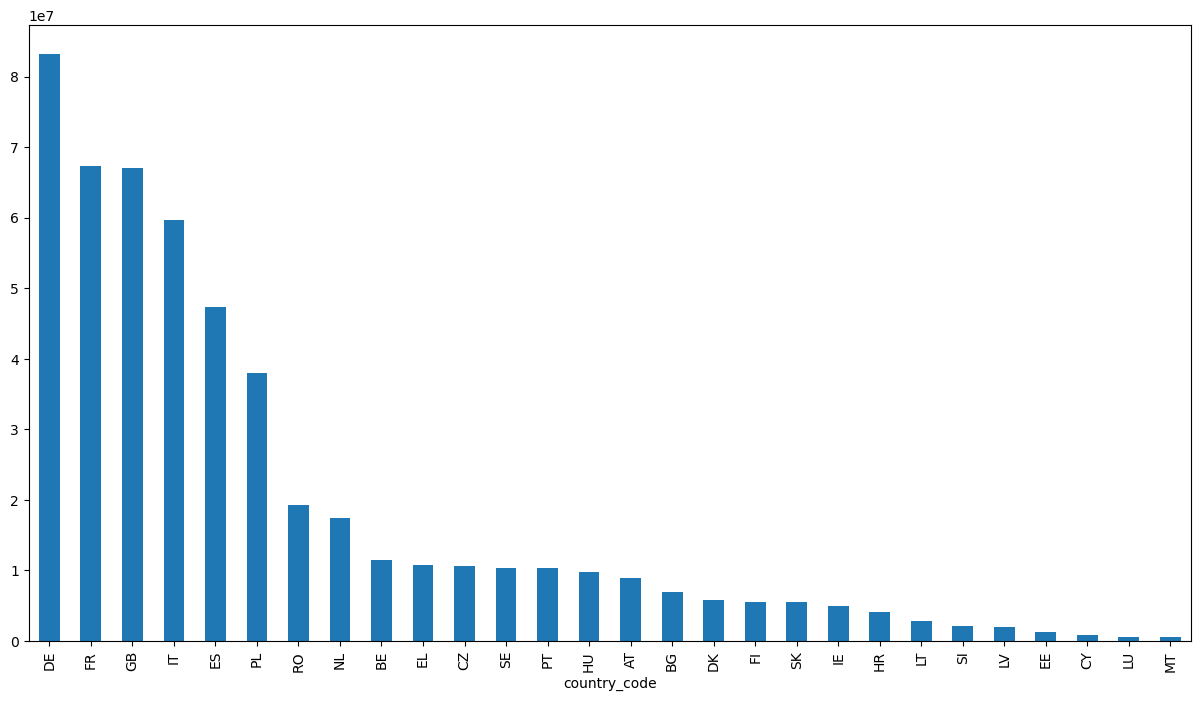

In [67]:
# Plot the population of the countries, in descending order
populations = df['population'].sort_values(ascending=False)
populations.plot.bar(figsize=(15,8))    # figure size in inches: 1 inch ≃ 2.5 cm

It is possible to improve the plots, such as adding a title for the figure and modifying the axes labels. You can refer to the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot).

Text(0, 0.5, 'countries')

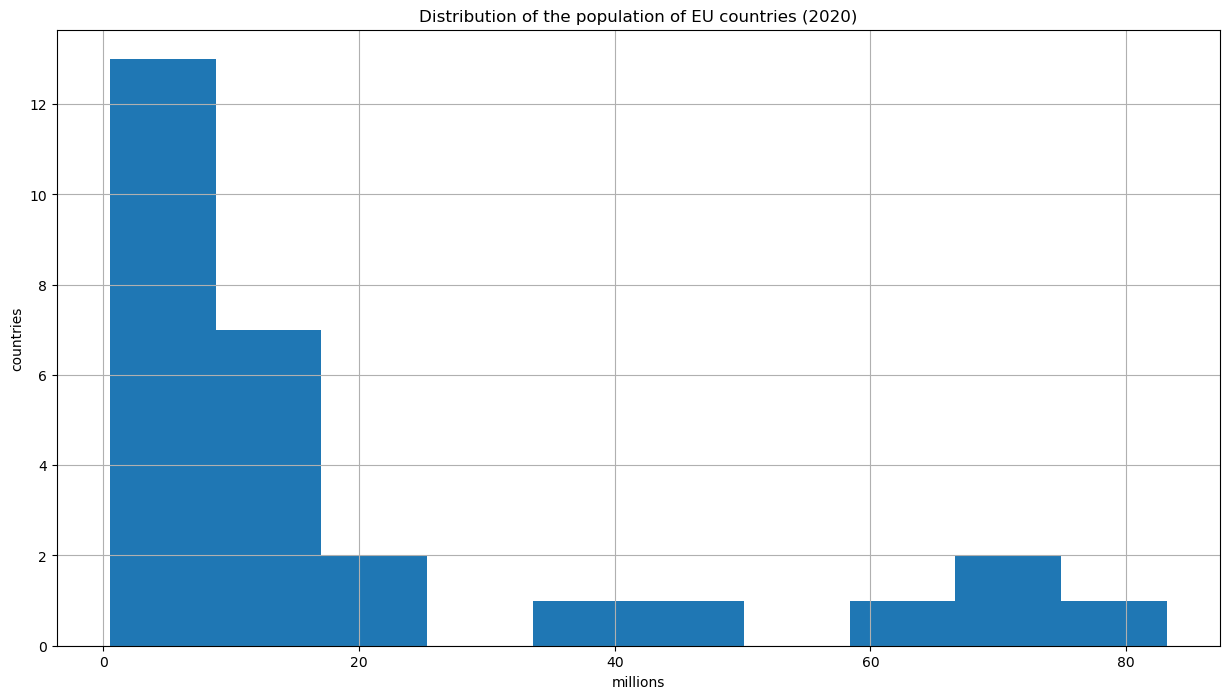

In [68]:
# Plot a histogram of the population of EU countries (in millions)
populations = df['population'] / 1e6
figure = populations.plot.hist(figsize=(15,8), title="Distribution of the population of EU countries (2020)", grid=True)
figure.set_xlabel("millions")
figure.set_ylabel("countries")

---------------------
## Serializing a dataframe

You can save the contents of a dataframe to a disk file. **pandas** natively support several formats (see [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#serialization-io-conversion)):

In [69]:
df

,country,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
country_code,,,,,,,,,
AT,Austria,Vienna,1995-01-01,8901064,True,109167,68280,3147.58431,2022.82140
BE,Belgium,Brussels,1957-03-25,11522440,True,150006,102936,3861.85136,8776.94290
BG,Bulgaria,Sofia,2007-01-01,6951482,False,37929,39941,488.28963,2204.76239
CY,Cyprus,Nicosia,2004-05-01,888005,True,26170,17373,184.06386,266.36914
CZ,Czechia,Prague,2004-05-01,10693939,False,105888,77798,1712.08821,5275.53828
DE,Germany,Berlin,1957-03-25,83166711,True,886341,576319,25819.96730,12214.16123
DK,Denmark,Copenhaguen,1973-01-01,5822763,False,61384,66520,2405.63503,1500.26135
EE,Estonia,Tallinn,2004-05-01,1328976,True,18259,12801,229.20519,1169.21184
EL,Greece,Athens,1981-01-01,10718565,True,129459,95020,1516.60105,5257.70783


In [70]:
# Save the dataset in 'parquet' format
parquet_path = os.path.join('..', 'data', 'european_union-2020.parquet')
df.to_parquet(parquet_path, compression='gzip')

In [71]:
# Check that now we have a 'parquet' file in our 'data' directory
import glob

glob.glob('../data/european_union-2020.*')

['../data/european_union-2020.csv', '../data/european_union-2020.parquet']

In [72]:
! ls -al ../data/european_union-2020.*

-rw-r--r--  1 fabio  staff  2376 Mar 16  2021 ../data/european_union-2020.csv
-rw-r--r--  1 fabio  staff  9616 Feb 26 17:41 ../data/european_union-2020.parquet


In [73]:
# Read back the dataset from the parquet file just created
new_df = pd.read_parquet(parquet_path)
new_df.sample(5)

,country,capital,accession_date,population,euro_zone_member,immigration,emigration,contribution_to_eu_budget_millions_euro,expenditure_eu_budget_millions_euro
country_code,,,,,,,,,
NL,Netherlands,Amsterdam,1957-03-25,17407585,True,215756,107906,5325.98800,2557.07893
LV,Latvia,Riga,2004-05-01,1907675,True,11223,14583,246.46871,1374.52826
ES,Spain,Madrid,1986-01-01,47332614,True,750480,296248,10221.12749,11266.81341
BG,Bulgaria,Sofia,2007-01-01,6951482,False,37929,39941,488.28963,2204.76239
HR,Croatia,Zagreb,2013-07-01,4058165,False,37726,40148,448.64161,2073.67501


---------------------
## Modifying the dataframe

You will often need to modify the dataframe, for instance, for cleaning it, for extending it or for computing new values useful in the data analysis process.

Please note that the modifications are applied to the in-memory data, not to the disk file, unless you explicitely save the dataframe to disk.

In [74]:
# Rename some dataframe columns to use shorter, more convenient names
df = df.rename(columns={
    # current column name                      new column name
    'contribution_to_eu_budget_millions_euro': 'budget_contribution',
    'expenditure_eu_budget_millions_euro':     'budget_expenditure',
})
df.head(3)

,country,capital,accession_date,population,euro_zone_member,immigration,emigration,budget_contribution,budget_expenditure
country_code,,,,,,,,,
AT,Austria,Vienna,1995-01-01,8901064,True,109167,68280,3147.58431,2022.82140
BE,Belgium,Brussels,1957-03-25,11522440,True,150006,102936,3861.85136,8776.94290
BG,Bulgaria,Sofia,2007-01-01,6951482,False,37929,39941,488.28963,2204.76239


You can also **extend the dataframe** by creating new columns, which values may be computed using other columns:

In [75]:
# Add two new columns 'budget_contribution_per_capita' and 'budget_expenditure_per_capita' to store the computed
# budget contribution and budget expenditure per capita.
# Note that the budget figures in the dataset are in millions
df['budget_contribution_per_capita'] = (df['budget_contribution'] * 1_000_000 ) / df['population']
df['budget_expenditure_per_capita']  = (df['budget_expenditure']  * 1_000_000 ) / df['population']

df.head(4).style.map(highlight_column, subset=['budget_contribution_per_capita', 'budget_expenditure_per_capita'])

,country,capital,accession_date,population,euro_zone_member,immigration,emigration,budget_contribution,budget_expenditure,budget_contribution_per_capita,budget_expenditure_per_capita
country_code,,,,,,,,,,,
AT,Austria,Vienna,1995-01-01,8901064,True,109167,68280,3147.584310,2022.821400,353.618883,227.256135
BE,Belgium,Brussels,1957-03-25,11522440,True,150006,102936,3861.851360,8776.942900,335.159164,761.726067
BG,Bulgaria,Sofia,2007-01-01,6951482,False,37929,39941,488.289630,2204.762390,70.242522,317.164367
CY,Cyprus,Nicosia,2004-05-01,888005,True,26170,17373,184.063860,266.369140,207.277955,299.963559


We can also compute a `panda.Series` of values from the values in the columns of the dataframe:

In [76]:
# Compute the net per-capita contribution to the EU budget for each country
net_contribution_per_capita = df['budget_contribution_per_capita'] - df['budget_expenditure_per_capita']
net_contribution_per_capita.sort_values(ascending=True)

country_code
LU   -2709.284484
EE    -707.316498
LV    -591.326903
HU    -523.351253
BE    -426.566902
LT    -422.489913
HR    -400.435517
EL    -349.030563
CZ    -333.221470
PL    -320.128820
MT    -296.916341
SK    -284.757229
PT    -257.149324
SI    -253.293248
BG    -246.921845
RO    -177.489452
CY     -92.685604
ES     -22.092292
IE     -15.157214
IT      59.855654
FI      85.863420
FR      87.984554
GB      95.764929
AT     126.362748
SE     129.460404
DK     155.488671
NL     159.063366
DE     163.596779
dtype: float64

In [77]:
print(f'The net contribution by France to the 2019 EU budget was approx. {net_contribution_per_capita["FR"]:.0f}€ per capita')

The net contribution by France to the 2019 EU budget was approx. 88€ per capita


We can use the methods `idxmin()` (or `idxmax()`) to retrieve the **index of the row** which contains the minimum (or maximum) value of a column in a `panda.Series`, as opposed to the minium (or maximum) value itself. In our case, we can use this to retrieve the country code (i.e. the value of the dataframe index) and then the country name:

In [78]:
# Retrieve the indexes of the rows with minimum and maximum values in the series 'net_contribution_per_capita'
net_contribution_per_capita.idxmin(), net_contribution_per_capita.idxmax()

('LU', 'DE')

In [79]:
# Retrieve the value of the minimum net contribution per capita
net_contribution_per_capita.min()

-2709.284484465939

In [80]:
index_min, index_max = net_contribution_per_capita.idxmin(), net_contribution_per_capita.idxmax()
df.loc[[index_min, index_max]]

,country,capital,accession_date,population,euro_zone_member,immigration,emigration,budget_contribution,budget_expenditure,budget_contribution_per_capita,budget_expenditure_per_capita
country_code,,,,,,,,,,,
LU,Luxembourg,Luxembourg City,1957-03-25,626108,True,26668,15593,364.7939,2061.09859,582.637341,3291.921825
DE,Germany,Berlin,1957-03-25,83166711,True,886341,576319,25819.9673,12214.16123,310.460363,146.863584


In [81]:
# Retrieve the name of the countries for those minimum and maximums
df.loc[[index_min, index_max], 'country']

country_code
LU    Luxembourg
DE       Germany
Name: country, dtype: object

In [82]:
# Retrieve the code of the countries with minimum and maximum value on the
# 'net_contribution_per_capita' series (computed above)
country_min_expenditure = df.loc[net_contribution_per_capita.idxmin(), 'country']
value_min_expenditure = net_contribution_per_capita.min()

country_max_expenditure = df.loc[net_contribution_per_capita.idxmax(), 'country']
value_max_expenditure = net_contribution_per_capita.max()

print(f'The country with lowest EU budget expenditure per capita in 2019 was:  {country_min_expenditure:>10} ({value_min_expenditure:,.0f} €)')
print(f'The country with highest EU budget expenditure per capita in 2019 was: {country_max_expenditure:>10} ({value_max_expenditure:,.0f} €)')

The country with lowest EU budget expenditure per capita in 2019 was:  Luxembourg (-2,709 €)
The country with highest EU budget expenditure per capita in 2019 was:    Germany (164 €)


----------
## Grouping

In some datasets, data is organized so that **grouping the observations** (i.e. the rows) is necessary to answer some analysis questions. **pandas** provides useful tools for grouping rows based on the values of one or more columns.

The data in the dataset we have been working on does not require grouping. We load a different, more complex and bigger dataset to explore how grouping works.

### load another dataset

The dataset we will use contains data about the names given to babies in France during from year 1900 to year 2022. For each given name you can find the sex of the baby (male or female), the year of birth, the department and the number of babies registered with that given name per year and per department.

You can find details of this public dataset, including the exact meaning of each variable (in French),  at https://www.insee.fr/fr/statistiques/7633685

In [84]:
# Download the dataset if necessary
data_dir = 'data'
path = os.path.join('..', data_dir, 'prenoms-fr-1900-2022.zip')

if not os.path.isfile(path):
    os.makedirs(os.path.join('..', data_dir), exist_ok=True)
    url = 'https://www.insee.fr/fr/statistiques/fichier/7633685/dpt2022_csv.zip'
    download(url, path)

In [85]:
# Load another dataset. Its fields are separated by ';'.
# We ask pandas to interpret the columns 'annais' and 'dpt' as strings to avoid error with missing
# values
names_df = pd.read_csv(path, sep=';', dtype={'annais':str, 'dpt':str})
rows, cols = names_df.shape
print(f'This dataset contains {rows:,} rows and {cols} columns')

This dataset contains 3,835,767 rows and 5 columns


In [86]:
names_df.sample(8)

,sexe,preusuel,annais,dpt,nombre
419578,1,EDEN,2021,29,23
1926112,2,ANDRÉE,1916,58,24
3558699,2,ROLANDE,1929,72,43
708049,1,HELIOTT,XXXX,XX,29
869864,1,JEREMY,1981,13,78
2152411,2,CÉCILE,1915,38,9
543543,1,FERNAND,1934,13,63
3408996,2,NÉLYA,2020,45,5


Below you can find an edited excerpt of the [meaning and coding conventions of the columns](https://www.insee.fr/fr/statistiques/2540004#dictionnaire) of this dataset. You may also want to read the excellent [documentation associated to this dataset](https://www.insee.fr/fr/statistiques/2540004#documentation):

*Le second fichier départemental comporte 3.784.673  enregistrements et cinq variables décrites ci-après.*
*Ce fichier est trié selon les variables `SEXE`, `PREUSUEL`, `ANNAIS`, `DPT`.*

* `SEXE`: sexe - Type : caractère - Longueur : 1 - Modalité : 1 pour masculin, 2 pour féminin
* `PREUSUEL`: premier prénom - Type : caractère - Longueur : 25
* `ANNAIS`: année de naissance - Type : caractère - Longueur : 4 - Modalité : 1900 à 2021, XXXX
* `DPT`: département de naissance - Type : caractère - Longueur : 3 - Modalité : liste des départements, XX
* `NOMBRE`: fréquence - Type : numérique - Longueur : 8

In [87]:
# Inspect the types of the columns dataset
names_df.dtypes

sexe         int64
preusuel    object
annais      object
dpt         object
nombre       int64
dtype: object

### cleaning the dataset

In [88]:
# This is a utility function we use for displaying the dataframe
def highlight_missing(s):
    missings = ('XX', 'XXXX', '_PRENOMS_RARES')
    return 'color: white; background-color: Crimson' if s in missings else ''

In [89]:
# Rename some columns to use more meaningful names
names_df = names_df.rename(columns={
    'sexe':      'sex',
    'preusuel':  'name',
    'annais':    'year',
    'dpt':       'department',
    'nombre':    'count'})

names_df.head().style.map(highlight_missing, subset=['name', 'year', 'department'])

,sex,name,year,department,count
0,1,_PRENOMS_RARES,1900,02,7
1,1,_PRENOMS_RARES,1900,04,9
2,1,_PRENOMS_RARES,1900,05,8
3,1,_PRENOMS_RARES,1900,06,23
4,1,_PRENOMS_RARES,1900,07,9


There are rows with missing values, which in this case are represented by the strings `XXXX` for year or `XX` for the department or `_PRENOMS_RARES` for the name column. For the purposes of this tutorial, we ignore those rows:

In [90]:
# Drop rows with missing department and year
names_df.drop(names_df[names_df['department'] == 'XX'].index, inplace=True)
names_df.drop(names_df[names_df['year'] == 'XXXX'].index, inplace=True)

# Convert column 'year' to numeric values
names_df['year'] = pd.to_numeric(names_df['year'])

names_df.dtypes

sex            int64
name          object
year           int64
department    object
count          int64
dtype: object

In this dataset, some given names are coded as `_PRENOMS_RARES`, to represent a group of given names used very few times (see the dataset documentation for details). For this exercise, we are not interested in that data, so we remove the rows in the dataset which contain that given name:

In [91]:
is_unusual = names_df['name'] == '_PRENOMS_RARES'
names_df[is_unusual].head().style.map(highlight_missing, subset=['name'])

,sex,name,year,department,count
0,1,_PRENOMS_RARES,1900,02,7
1,1,_PRENOMS_RARES,1900,04,9
2,1,_PRENOMS_RARES,1900,05,8
3,1,_PRENOMS_RARES,1900,06,23
4,1,_PRENOMS_RARES,1900,07,9


In [92]:
# Compute the fraction of unusual names we will exclude from our analysis
rows, _ = names_df.shape
unusual_rows, _ = names_df[is_unusual].shape
print(f'There are {unusual_rows:,} out of {rows:,} rows with unusual names, that is {100*unusual_rows/rows:0.2}% of the dataset')

There are 22,449 out of 3,796,434 rows with unusual names, that is 0.59% of the dataset


In [93]:
names_df.drop(names_df[is_unusual].index, inplace=True)

Check that there are no rows which contain `_PRENOMS_RARES` in the column `name`:

In [94]:
names_df[names_df['name'] == '_PRENOMS_RARES'].count()

sex           0
name          0
year          0
department    0
count         0
dtype: int64

### explore the dataset

In this dataset, the column `sex` is coded as `1` (one) for males and `2` (two) for females. Create two views of the dataset, one for boys and one for girls:

In [95]:
# For convenience, create two views of the dataset
boys  = names_df[names_df['sex'] == 1]
girls = names_df[names_df['sex'] == 2]

# Count the number of babies of each sex contained in the dataset
print(f"Babies registered from 1900 to 2021:")
print(f"   boys: {boys['count'].sum():,}")
print(f"  girls: {girls['count'].sum():,}")
print(f"  total: {names_df['count'].sum():,}")

Babies registered from 1900 to 2021:
   boys: 39,496,613
  girls: 37,790,410
  total: 77,287,023


### aside: configure matplotlib

In [96]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams["figure.figsize"] = (8,4)
matplotlib.rcParams["figure.dpi"] = 150
matplotlib.rcParams["font.size"] = 12

### grouping rows

We want to plot the evolution of the babies over time. We group the rows by the value in the column `year` and for each resulting group we sum the values of the `count` column to obtain the total number of babies registered each year:

In [97]:
babies_per_year = names_df.groupby(['year'])['count'].sum()
babies_per_year

year
1900    390505
1901    428658
1902    440851
1903    443630
1904    453715
         ...  
2018    514362
2019    507477
2020    490818
2021    497927
2022    478822
Name: count, Length: 123, dtype: int64

(0.0, 891191.45)

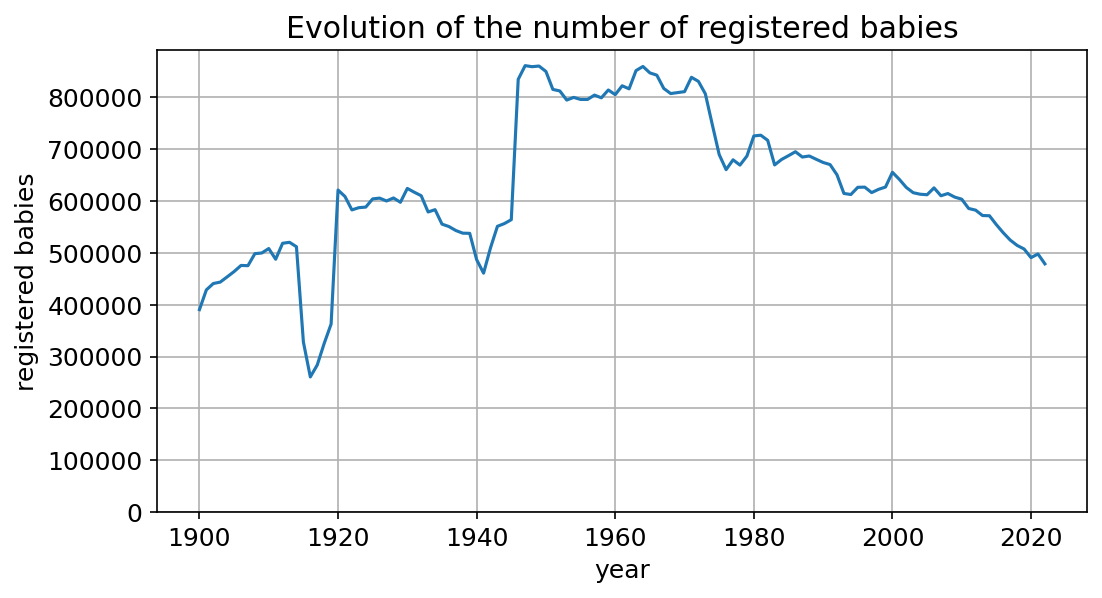

In [98]:
fig = babies_per_year.plot.line(title="Evolution of the number of registered babies", grid=True)
fig.set_ylabel("registered babies")
fig.set_ylim(0)

We may want to focus on a subset of the rows. For instance, zoom in on the data over the period 1910 to 1925:

(0.0, 639256.55)

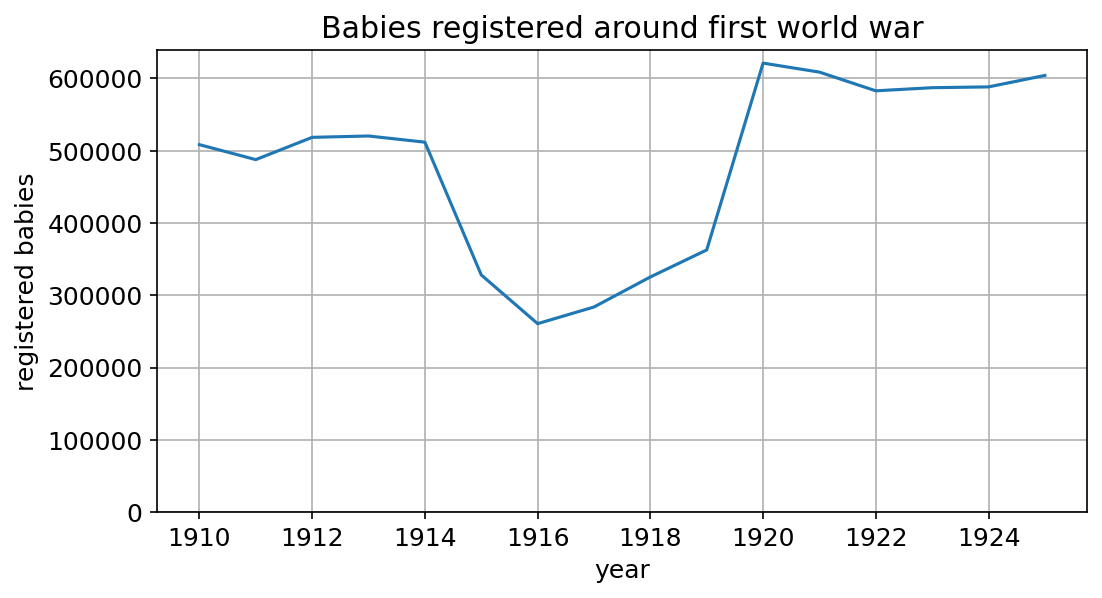

In [99]:
first_ww = babies_per_year.loc[1910:1925].plot.line(title="Babies registered around first world war", grid=True)
first_ww.set_ylabel("registered babies")
first_ww.set_ylim(0)

We want to know how many boys were given the name **Zinedine** before an after year 1998, when France won the football world cup:

In [100]:
zinedines = boys[boys['name'] == 'ZINEDINE']
zinedines_before_1998 = zinedines[zinedines['year'] <  1998]['count'].sum()
zinedines_after_1998  = zinedines[zinedines['year'] >= 1998]['count'].sum()

print(f"Number of boys named 'Zinedine' in France:")
print(f"   before 1998: {zinedines_before_1998: 5}")
print(f"    since 1998:  {zinedines_after_1998: 5}")

Number of boys named 'Zinedine' in France:
   before 1998:    50
    since 1998:   1171


We want to get more details about the years those babies were named **Zinedine**, so we group the data by year: 

In [101]:
# Group the "zinedines" per year and for each group sum the values of column 'count'
zinedines_per_year = zinedines.groupby(['year'])['count'].sum()
zinedines_per_year.tail()

year
2017    31
2018     6
2019     3
2020    11
2022    21
Name: count, dtype: int64

Make a plot to visually explore the results of the operation above. For this we use **matplotlib**. Please ignore for now the details of how to use matplotlib. We look in more detail some aspects of data visualisation in [this notebook](visualisation.ipynb).

<Axes: title={'center': 'Evolution of number of babies named Zinedine'}, xlabel='year'>

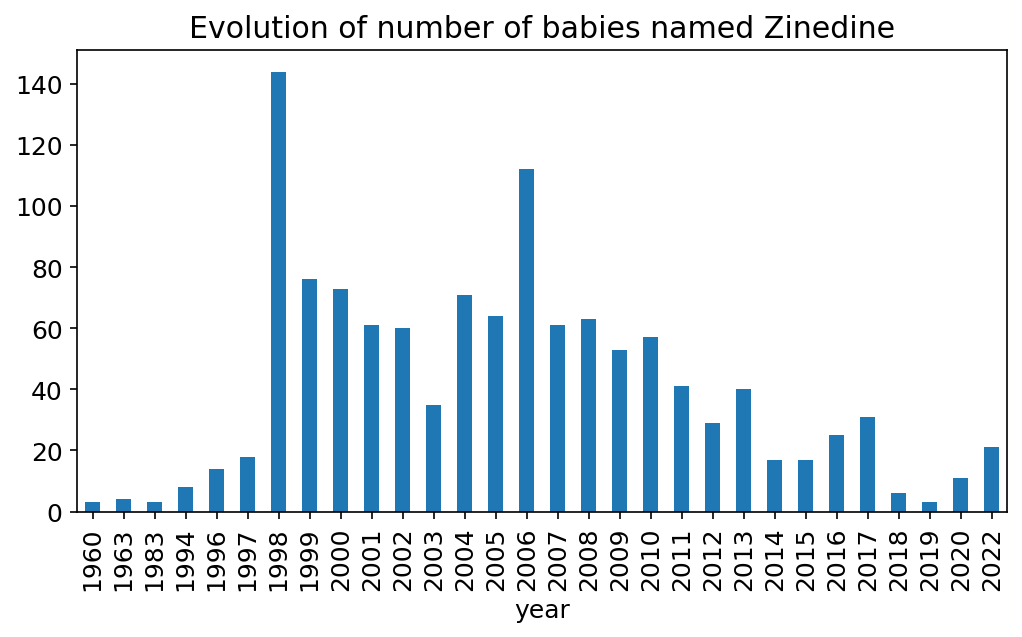

In [102]:
# Plot the number of "zinedines" as a function of the year
zinedines_per_year.plot.bar(title="Evolution of number of babies named Zinedine")

----------
## Joining dataframes

It is usual that for analysing a dataset we need to join information found in several distinct datasets. **pandas** provides mechanisms for joining dataframes.

Motivating example: we want to identify the top 5 departments where the boys named *Zinedine* were born in year 1998.

In [103]:
# Select the boys, named 'ZINEDINE', born in year 1998
zinedines_1998 = boys[(boys['name'] == 'ZINEDINE') & (boys['year'] == 1998)]
zinedines_1998.nlargest(5, 'count').loc[:, ['department', 'count']]

,department,count
1782998,13,16
1783007,59,13
1783009,69,13
1783014,92,12
1783015,93,12


The data we have in our example dataframe does not include the name of the department associated to those values (e.g. 13, 59, 69, etc.). We will use an additional helper dataframe for retrieving the names of those departments.

### download another dataset

In [104]:
# Download the dataset if necessary
data_dir = 'data'
path = os.path.join('..', data_dir, 'departements-region.csv')

if not os.path.isfile(path):
    os.makedirs(os.path.join('..', data_dir), exist_ok=True)
    url = 'https://www.data.gouv.fr/en/datasets/r/987227fb-dcb2-429e-96af-8979f97c9c84'
    download(url, path)

In [105]:
dept_df = pd.read_csv(path, index_col=0)
rows, cols = dept_df.shape
print(f'This dataset contains {rows:,} rows and {cols} columns')

This dataset contains 101 rows and 2 columns


In [106]:
dept_df.sample(5)

,dep_name,region_name
num_dep,,
02,Aisne,Hauts-de-France
63,Puy-de-Dôme,Auvergne-Rhône-Alpes
66,Pyrénées-Orientales,Occitanie
04,Alpes-de-Haute-Provence,Provence-Alpes-Côte d'Azur
971,Guadeloupe,Guadeloupe


In [107]:
# Reminder: select the Zinedines born in 1998
zinedines_1998 = boys[(boys['name'] == 'ZINEDINE') & (boys['year'] == 1998)]
zinedines_1998.head()

,sex,name,year,department,count
1782997,1,ZINEDINE,1998,06,6
1782998,1,ZINEDINE,1998,13,16
1782999,1,ZINEDINE,1998,25,4
1783000,1,ZINEDINE,1998,26,3
1783001,1,ZINEDINE,1998,30,3


Now we can **join** both dataframes to include all the data we need in each row, in particular the name of the department:

In [108]:
# Join both datasets using the index of 'dept_df' and the column 'department' of the 'zinedines_1998' dataframe
zinedines_1998 = boys[(boys['name'] == 'ZINEDINE') & (boys['year'] == 1998)]

# Create a new dataframe which is the result of joining the dataframes 'zinedines_1998' and 'dept_df' using
# the values in the column 'department' of the first dataframe.
zinedines_1998_full = zinedines_1998.join(dept_df, on='department')

zinedines_1998_full.sample(5).style.map(highlight_column, subset=['department', 'dep_name'])

,sex,name,year,department,count,dep_name,region_name
1783012,1,ZINEDINE,1998,83,4,Var,Provence-Alpes-Côte d'Azur
1782999,1,ZINEDINE,1998,25,4,Doubs,Bourgogne-Franche-Comté
1783001,1,ZINEDINE,1998,30,3,Gard,Occitanie
1783015,1,ZINEDINE,1998,93,12,Seine-Saint-Denis,Île-de-France
1782998,1,ZINEDINE,1998,13,16,Bouches-du-Rhône,Provence-Alpes-Côte d'Azur


We have now a dataframe with contains the selected rows each with all the information we need to answer the question: *what are the names of the top 5 deparments where the boys born in 1998 were named 'Zinedine'?*

In [109]:
top_depts = zinedines_1998_full.nlargest(5, 'count')
top_depts[['count', 'dep_name']]

,count,dep_name
1782998,16,Bouches-du-Rhône
1783007,13,Nord
1783009,13,Rhône
1783014,12,Hauts-de-Seine
1783015,12,Seine-Saint-Denis


In [110]:
# Extract the values of the series
for count, dept in zip(top_depts['count'].values, top_depts['dep_name'].values):
    print(f'{count}  {dept}')

16  Bouches-du-Rhône
13  Nord
13  Rhône
12  Hauts-de-Seine
12  Seine-Saint-Denis


-------------
## Acknowledgements
<a id='Acknowledgements'></a>

These are the sources this notebook is based on. You are encouraged to consult them to deep further:

* [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jave VanderPlas (highly recommended book)
* [Intro to pandas](https://pandas.pydata.org/docs/getting_started/index.html#intro-to-pandas)
* Data School [Pandas best practices](https://youtu.be/hl-TGI4550M) (video)
* Dunder Data's [Intro to Pandas](https://youtu.be/31wa8tmrkPU) video series
* Python Bootcamp organised by the [Berkeley Institute for Data Science (BIDS)](https://bids.berkeley.edu) in the Fall 2016: [videos](https://bids.berkeley.edu/news/python-boot-camp-fall-2016-training-videos-available-online) and [notebooks](https://github.com/profjsb/python-bootcamp)
* [Python for Data Analysis](https://www.oreilly.com/library/view/python-for-data/9781491957653) 2nd Edition, by Wes McKinney